In [1]:
from dstaster import *

<h2>Loading the dataset</h2>

The following code cells loads the Tate dataset and stores it in the variable `collection`. The data is stored in a so-called `DataFrame` which is provided to us by the pandas library (abbreviated in the code by `pd`).

The second line passes the DataFrame to the magic Jupyter `display(...)` function which provides us with a pretty-printed excerpt of the dataset. If you run the cell, you should see a table with six columns (artist, title, year, groundtruth, height and width).

In [2]:
collection = pd.read_csv("../tate/paintings.csv", index_col=0)
display(collection)

,artist,title,year,groundtruth,height,width
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394
...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022
T14823,Unknown artist,Leon Trotsky,1980,P,510,480
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116
T14824,Unknown artist,Leon Trotsky,1980,P,638,511


Pandas DataFrames are very powerful data structures that come with a lot of useful functionality. For example, we can ask the DataFrame to compute common statistics for all numerical columns. When we call `collection.describe()` we receive a new DataFrame containing the summary of `collection`. Note that we can leave away the call to `display`: Jupyter automatically displays whatever the last statement in the cell returns.

In [3]:
collection.describe()

,year,height,width
count,2158.000000,2158.000000,2158.000000
mean,1873.828082,960.444856,1026.646895
std,76.739168,529.841346,642.269151
min,1594.000000,137.000000,102.000000
25%,1824.000000,610.000000,616.000000
50%,1889.500000,813.000000,893.500000
75%,1934.000000,1219.000000,1232.000000
max,2017.000000,4285.000000,8915.000000


Each column of the DataFrame can be access individually using the index brackets `[]`. For example, `collection['artist']` will give us the artist column, `collection['year']` the year column and so on. 

<div class="note">Note: A single column of a DataFrame is a data structure called a Series, so it's representation in the notebook looks slightly differently.</div>

<div class="task">
    <div class="no">1</div>
    <div class="text">
        Change the index string in the following cell to
        values other than <code>'artist'</code> and observe how 
        the output changes.
    </div>
</div>

In [4]:
collection['artist']

T13896                    John Constable
T05010                     Pablo Picasso
N05915                     Pablo Picasso
N00530     Joseph Mallord William Turner
T00598                      Richard Dadd
                       ...              
N05609                    Maurice Sterne
T14823                    Unknown artist
AL00397                 Louise Bourgeois
T14824                    Unknown artist
T14825                    Unknown artist
Name: artist, Length: 2158, dtype: object

We can also write basic queries to filter the data. The first line creates a <i>boolean index</i>: for every entry 

In [5]:
idx = collection['year'] == 1900
collection[idx]

,artist,title,year,groundtruth,height,width
N01839,Sir Frank Dicksee,The Two Crowns,1900,O,2311,1823
N02940,Sir William Orpen,The Mirror,1900,P,508,406
N05261,Philip Wilson Steer,Seated Nude: The Black Hat,1900,P,508,406
N05905,Henri Matisse,Notre-Dame,1900,L,460,375
N01772,Ralph Peacock,The Sisters,1900,P,1675,1275
N01901,Sir James Jebusa Shannon,The Flower Girl,1900,P,838,660
N04917,Sir Alfred East,Golden Autumn,1900,L,1225,1530
N01838,Harry William Adams,Winter’s Sleep,1900,L,1226,1841
N06080,Ambrose McEvoy,"Bessborough Street, Pimlico",1900,O,457,356
T03648,William Evelyn Osborn,"Royal Avenue, Chelsea",1900,O,505,610


In [6]:
from ipywidgets import *
import ipywidgets as widgets

try:
    # Tests a) that the variable is defined and b) that it's not None
    if collection is None: 
        raise NameError
except NameError:
    error("<code>collection</code> undefined.",
          "Did you run the code cells above?")

def plot_hist(bin_size):
    fig, ax = plt.subplots(dpi=300, figsize=(7,3.5))
    ax.hist(collection['year'], bins=range(1550,2051,bin_size), color=colors['blue'])
    ax.set_title('Number of paintings in Tate collection')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of paintings')
    
config = {
    'continuous_update': False,
    'min': 1,
    'value': 10,
    'max': 100
}

layout = {
    'width': '70%',
}

slider = widgets.IntSlider(**config, layout=layout, description="Bin size")
interact(plot_hist, bin_size=slider)

pass

interactive(children=(IntSlider(value=10, continuous_update=False, description='Bin size', layout=Layout(width…

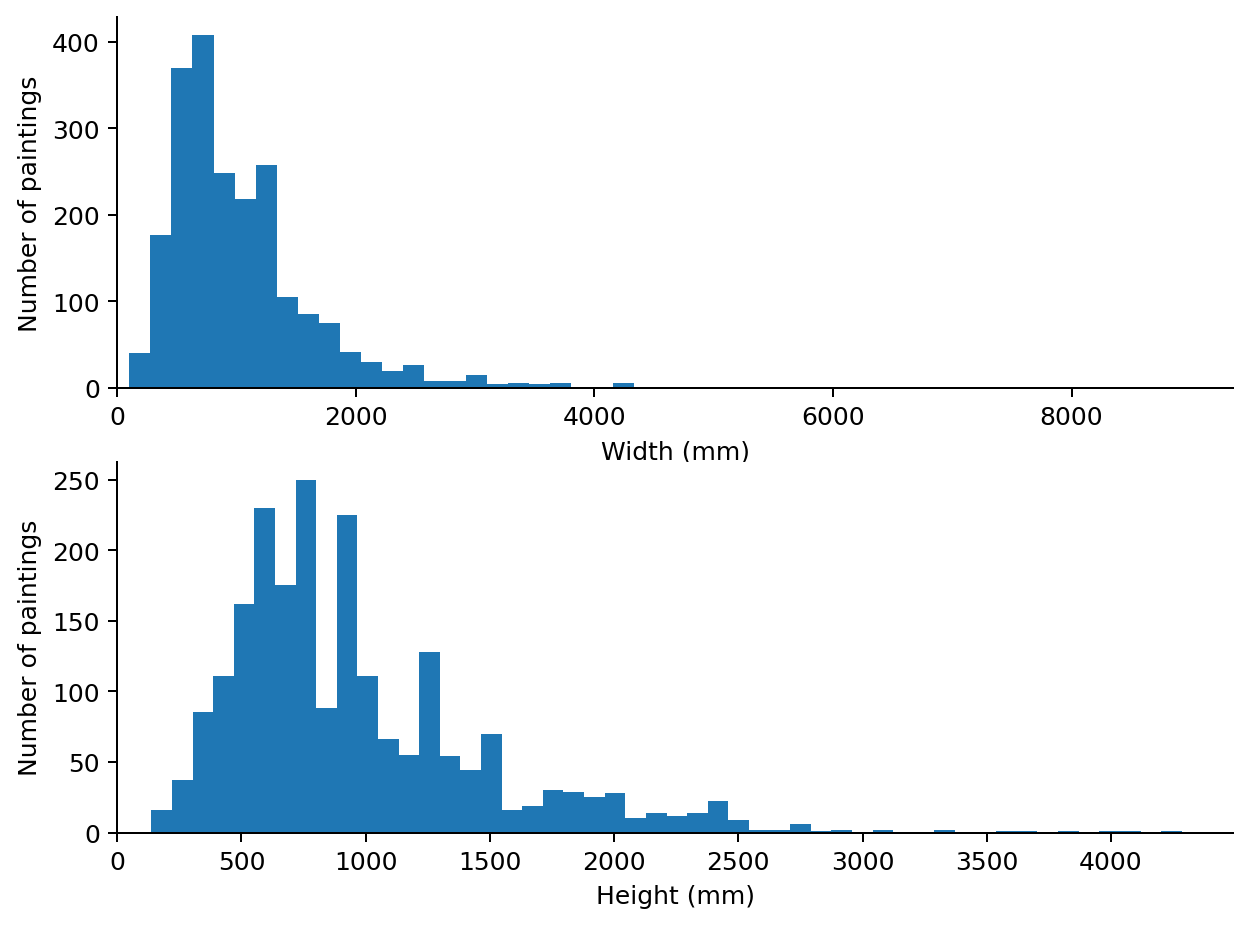

In [7]:
fig, axes = plt.subplots(2, 1, dpi=180, figsize=(8,6))

ax1, ax2 = axes
ax1.hist(collection['width'], bins=50)
ax2.hist(collection['height'], bins=50)
ax1.set_ylabel("Number of paintings")
ax2.set_ylabel("Number of paintings")
ax1.set_xlabel("Width (mm)")
ax2.set_xlabel("Height (mm)")

# ax1.set_xticks(range(0,8001,1000))
# ax1.set_xticks(range(0,8001,500), minor=True)

# ax2.set_xticks(range(0,4001,1000))
# ax2.set_xticks(range(0,4001,500), minor=True)

ax1.set_xlim(0)
ax2.set_xlim(0)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


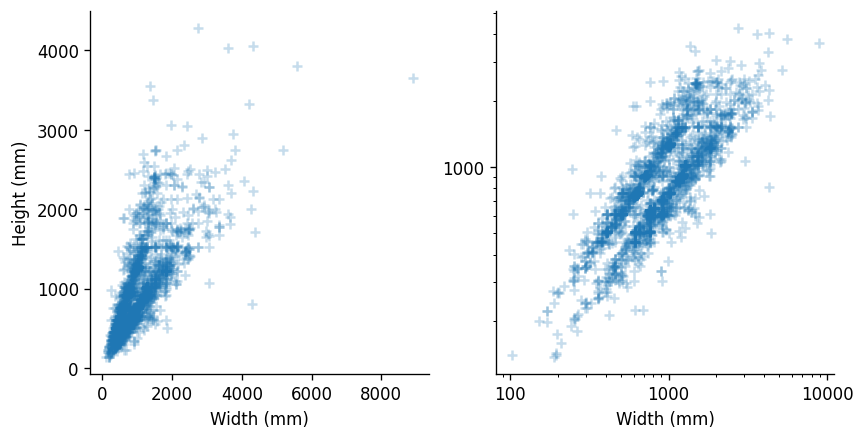

In [8]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(1, 2, dpi=120, figsize=(8,4))

ax1, ax2 = axes

ax1.scatter(collection['width'], collection['height'], marker='+', alpha=.25)
ax2.scatter(collection['width'], collection['height'], marker='+', alpha=.25)

ax1.set_xlabel('Width (mm)')
ax1.set_ylabel('Height (mm)')
ax2.set_xlabel('Width (mm)')
# ax1.set_ylabel('Height (mm)')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.yaxis.set_major_formatter(ScalarFormatter())

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
